# **SISTEM REKOMENDASI DESTINASI WISATA NoD (NEAR OF DESTINATION)**


---
Team ID : `C241-PS414`


# Instalasi Libraries
**`Numpy` `Scikit-Learn` `Surprise` `Geodesic` `Pandas` `TensorFlow` `TensorFlowJs`**

In [ ]:
!pip install surprise
!pip install tensorflow
!pip install tensorflowjs
!pip install pydantic-settings
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357223 sha256=22f1fe84b043410bf841fb41d045d485c265cabc18d2e0fdf6d555fe959dd089
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 879.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB

In [ ]:
# Manipulasi dan Analisis Data
# pandas: Untuk manipulasi data dan analisis data.
# numpy: Untuk operasi numerik.
import pandas as pd
import numpy as np
import sklearn

# Visualisasi Data
# seaborn: Untuk visualisasi data statistik.
# matplotlib.pyplot: Untuk membuat plot dan grafik.
import seaborn as sns
import matplotlib.pyplot as plt

# Pembelajaran Mesin
# sklearn.preprocessing: Untuk encoding label dan standarisasi fitur.
# sklearn.model_selection: Untuk membagi dataset menjadi set pelatihan dan set pengujian.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Deep Learning
# tensorflow.keras.models: Untuk membangun dan menyimpan model.
# tensorflow.keras.layers: Untuk membuat lapisan dalam model neural network.
# tensorflow.keras.callbacks: Untuk callback seperti early stopping.
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam
# Geographical Calculations
# geopy.distance: Untuk menghitung jarak geografis antara koordinat.
from geopy.distance import geodesic

# Profiling dan Pelaporan Data
# ydata_profiling: Untuk membuat laporan profil data secara otomatis.
import ydata_profiling

# Interaksi Sistem dan File
# os: Untuk berinteraksi dengan sistem operasi, seperti membaca daftar file dalam direktori.
# shutil: Untuk mengoperasikan file dan koleksi file.
import os
import shutil

# Google Colab Integration
# google.colab.drive: Untuk mengakses Google Drive dari Colab.
# google.colab.files: Untuk mengunduh file dari Colab.
from google.colab import drive
from google.colab import files

# TensorFlow.js Conversion
# tensorflowjs: Untuk konversi model Keras ke format TensorFlow.js.
import tensorflowjs as tfjs

# Mengimpor warnings dan menonaktifkan pesan peringatan selama eksekusi kode
import warnings
warnings.filterwarnings("ignore")

import folium
from folium.plugins import MarkerCluster

# Menampilkan versi dari setiap library
print("Numpy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)
print("TensorFlow.js version:", tfjs.__version__)

Numpy version: 1.25.2
Scikit-learn version: 1.2.2
Pandas version: 2.0.3
TensorFlow version: 2.16.1
TensorFlow.js version: 4.20.0


# Data Wrangling
* **Gathering Data** = Melakukan pengumpulan data serta membaca dataset
* **Assessing Data** = Memeriksa dan memahami data
* **Cleaning Data** = Membersihkan data dari kesalahan/error

## **Gathering Data**

In [ ]:
# Mengakses dataset dari Google Drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ML"
fnames = os.listdir(path)
print(fnames)

Mounted at /content/drive
['NoD.csv', 'NoD_Recommendation.ipynb', 'NoD.ipynb']


In [ ]:
# Load Dataset
NoD = pd.read_csv('/content/drive/MyDrive/ML/NoD.csv')

In [ ]:
# Menampilkan informasi ringkas tentang DataFrame
NoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15430 entries, 0 to 15429
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wilayah         15430 non-null  object 
 1   Provinsi        15430 non-null  object 
 2   Kabupaten/Kota  15430 non-null  object 
 3   Nama Wisata     15430 non-null  object 
 4   Rating          15430 non-null  float64
 5   Reviews         15430 non-null  int64  
 6   Jenis Wisata    15430 non-null  object 
 7   Latitude        15430 non-null  float64
 8   Longitude       15430 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
# Menampilkan beberapa baris pertama dari DataFrame
NoD.head()

Wilayah Provinsi Kabupaten/Kota                      Nama Wisata  Rating  \
0  Sumatra     Aceh     Aceh Barat                Pantai Suak Ribee     4.2   
1  Sumatra     Aceh     Aceh Barat  Makam Teuku Umar Johan Pahlawan     4.4   
2  Sumatra     Aceh     Aceh Barat              Pantai Lhok Geudong     4.0   
3  Sumatra     Aceh     Aceh Barat           Tugu kupiah Teuku Umar     4.5   
4  Sumatra     Aceh     Aceh Barat              Pantai Ujung Karang     4.3   

   Reviews Jenis Wisata  Latitude  Longitude  
0      329          Air  4.154143  96.109822  
1      143      Monumen  4.424641  96.180474  
2      359          Air  4.129719  96.130043  
3      897      Monumen  4.148004  96.115770  
4      629          Air  4.124800  96.127896

## **Assessing Data**

### Struktur Data

In [ ]:
print(NoD.shape)

(15430, 9)


### Kualitas Data

In [ ]:
# Nilai yang hilang
print(NoD.isnull().sum())

Wilayah           0
Provinsi          0
Kabupaten/Kota    0
Nama Wisata       0
Rating            0
Reviews           0
Jenis Wisata      0
Latitude          0
Longitude         0
dtype: int64


In [ ]:
# Duplikasi
print(NoD.duplicated().sum())

201


In [ ]:
# Ringkasan statistik untuk mendeteksi outlier
print(NoD.describe())

             Rating        Reviews      Latitude     Longitude
count  15430.000000   15430.000000  15430.000000  15430.000000
mean       4.402145     776.201426     -4.055113    113.333600
std        0.423801    3608.317567      3.810894      9.341979
min        0.000000       0.000000    -10.952711     95.225960
25%        4.200000      10.000000     -7.534722    106.148369
50%        4.400000      70.000000     -4.776871    112.454003
75%        4.600000     362.750000     -0.969197    120.005689
max        5.600000  161208.000000      5.996378    140.976387


### Analisis Statistik Deskriptif

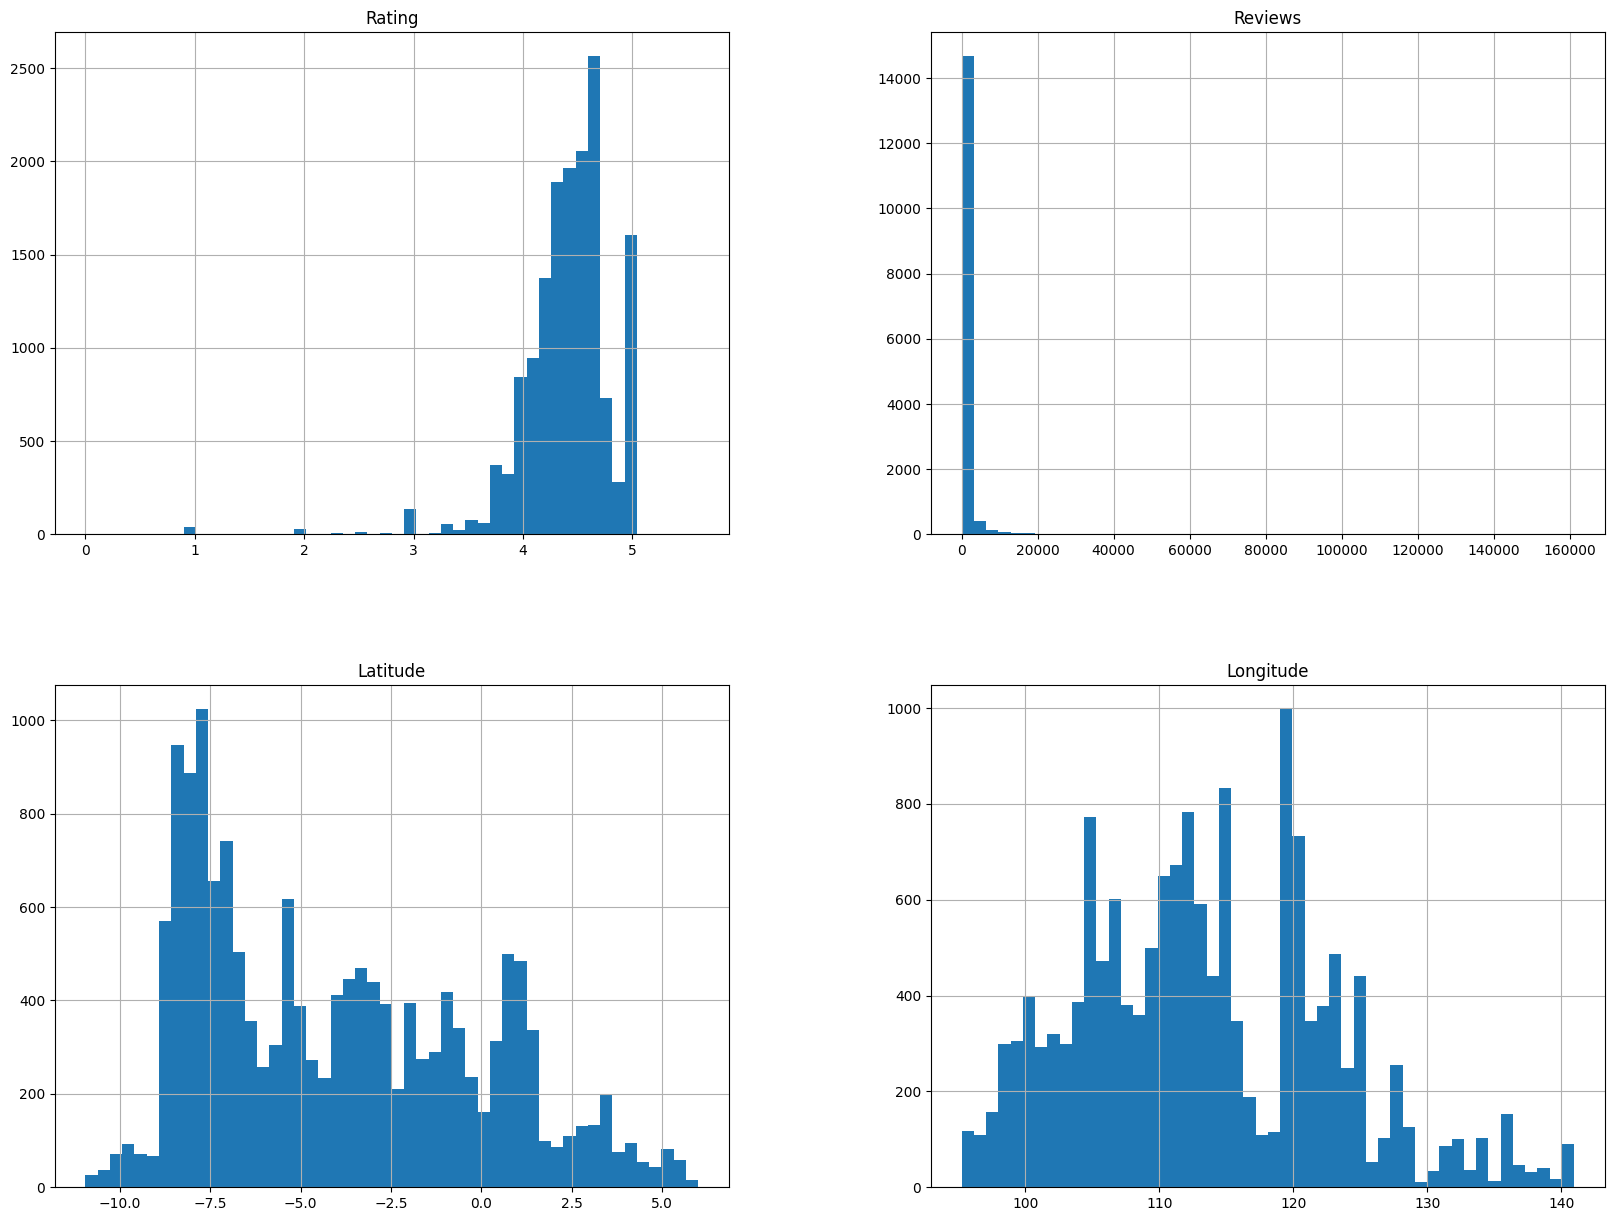

In [ ]:
# Histogram untuk kolom numerik
NoD.hist(bins=50, figsize=(20, 15))
plt.show()

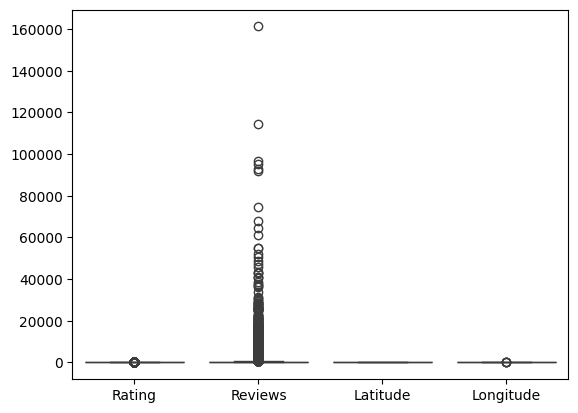

In [ ]:
# Boxplot untuk mendeteksi outlier
sns.boxplot(data=NoD.select_dtypes(include=['float64', 'int64']))
plt.show()

### Memahami Konten Data

In [ ]:
print(NoD['Wilayah'].value_counts())

Wilayah
Jawa                4334
Sumatra             3982
Sulawesi            2891
Nusa Tenggara       1849
Kalimantan          1099
Papua                654
Kepulauan Maluku     621
Name: count, dtype: int64


In [ ]:
print(NoD['Provinsi'].value_counts())

Provinsi
Jawa Timur                   1828
Sulawesi Selatan             1121
Jawa Tengah                   992
Nusa Tenggara Timur           845
Lampung                       798
Jawa barat                    734
Bali                          729
Sumatera Utara                621
Sulawesi Utara                544
Sulawesi Tengah               503
Sumatera Barat                428
Kalimantan Barat              395
Sulawesi Tenggara             388
Aceh                          370
Maluku                        361
Sumatera Selatan              347
Kepulauan Bangka Belitung     336
Kepulauan Riau                293
Jambi                         280
Nusa Tenggara Barat           275
Riau                          274
Maluku Utara                  260
DKI Jarkarta                  259
Kalimantan Selatan            253
Bengkulu                      235
Kalimantan Tengah             208
Papua Barat                   204
Banten                        202
Yogyakarta                    194
Papua

In [ ]:
print(NoD['Kabupaten/Kota'].value_counts())

Kabupaten/Kota
Manggarai              180
Buleleng               152
Jember                 108
Minahasa               106
Pesawaran              101
                      ... 
Nias Barat               3
Dogiyai                  3
Labuhanbatu Selatan      3
Buton Tengah             3
Banggai Laut             1
Name: count, Length: 480, dtype: int64


In [ ]:
print(NoD['Jenis Wisata'].value_counts())

Jenis Wisata
Air        7580
Taman      4421
Bukit      1685
Monumen    1067
Religi      677
Name: count, dtype: int64


### Distribusi Data untuk Setiap Fitur

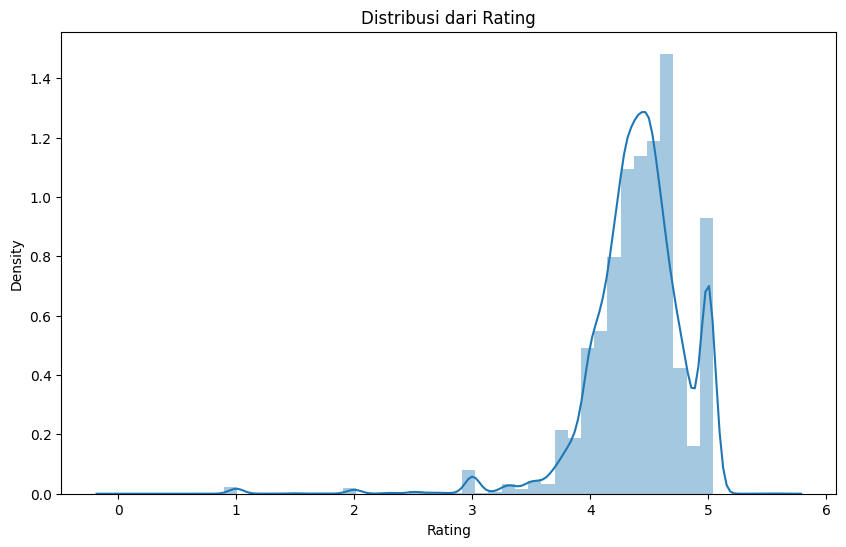

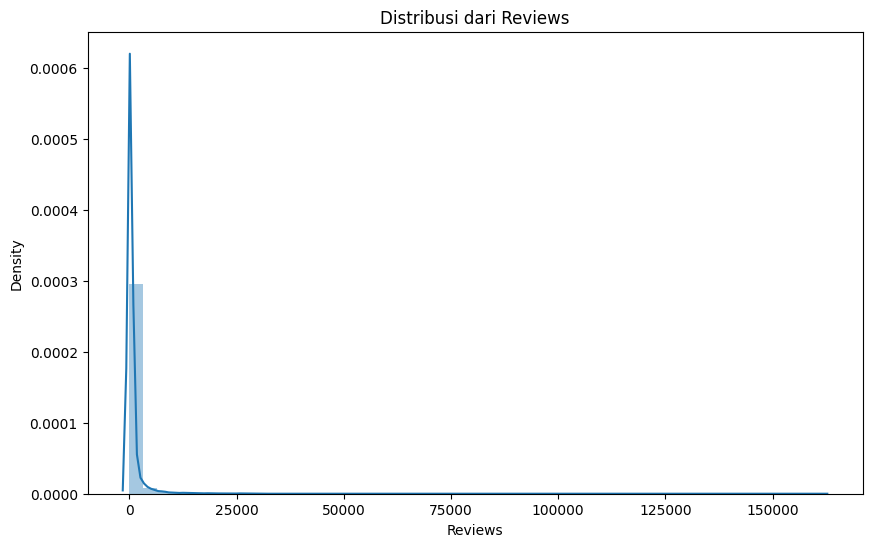

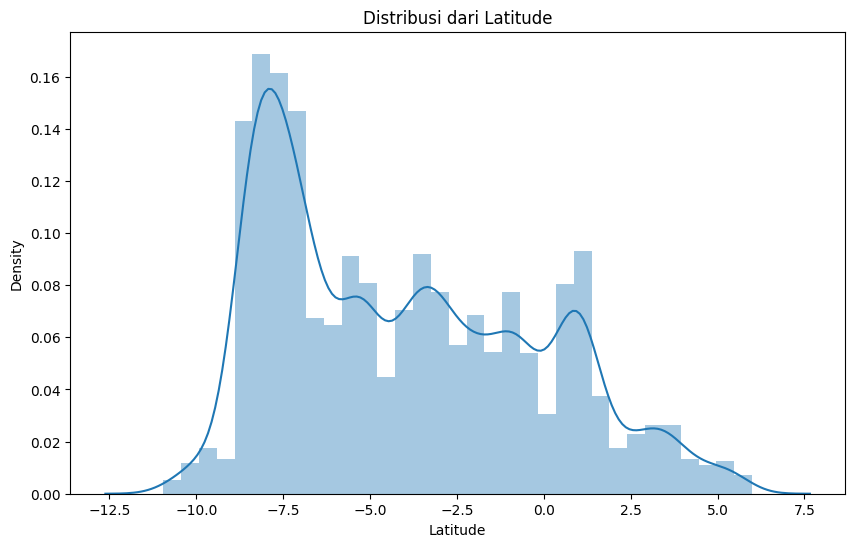

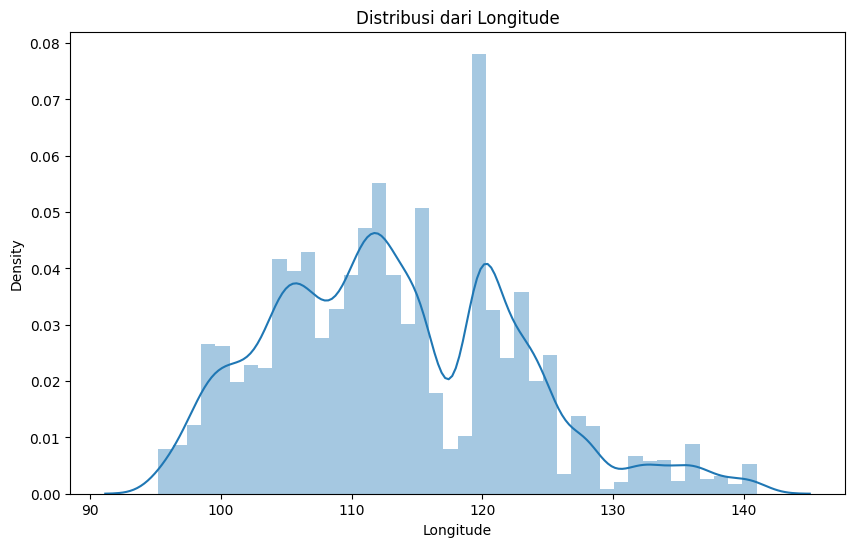

In [ ]:
for column in NoD.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(NoD[column].dropna(), kde=True)
    plt.title(f'Distribusi dari {column}')
    plt.show()

### Analisis Kategorikal

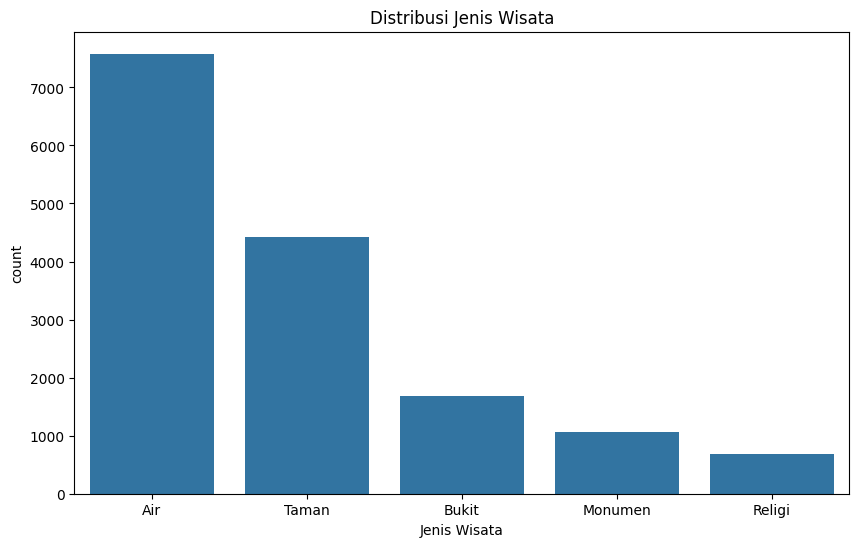

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=NoD, x='Jenis Wisata', order=NoD['Jenis Wisata'].value_counts().index)
plt.title('Distribusi Jenis Wisata')
plt.show()

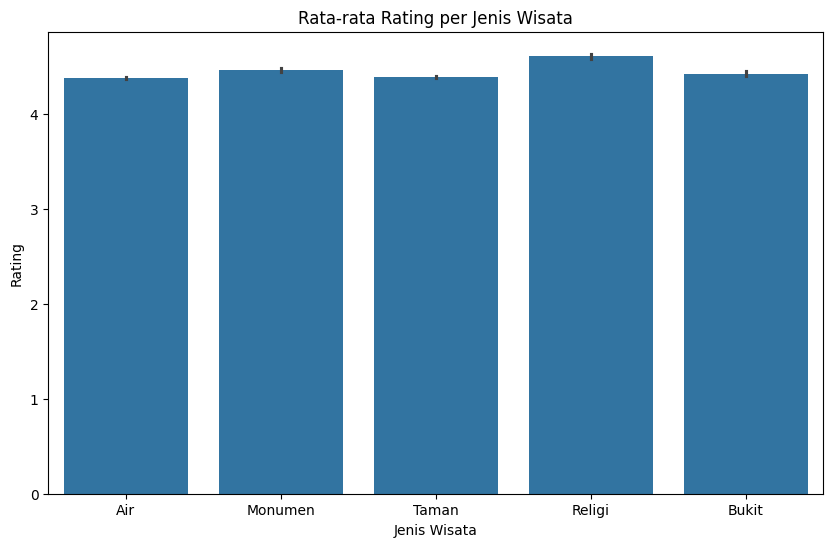

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=NoD, x='Jenis Wisata', y='Rating')
plt.title('Rata-rata Rating per Jenis Wisata')
plt.show()

### Analisis Geospasial

In [ ]:
# Membuat peta dasar
map_ = folium.Map(location=[-8.260630934632104, 115.39061833298781], zoom_start=10)

# Menambahkan titik-titik data ke peta
marker_cluster = MarkerCluster().add_to(map_)
for idx, row in NoD.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['Nama Wisata']).add_to(marker_cluster)

map_

### Mengecek Outlier

In [ ]:
# Menghitung Q1, Q3, dan IQR
Q1 = NoD['Reviews'].quantile(0.25)
Q3 = NoD['Reviews'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers_reviews = NoD[((NoD['Reviews'] < (Q1 - 1.5 * IQR)) | (NoD['Reviews'] > (Q3 + 1.5 * IQR)))]

# Mengetahui jumlah data yang outlier
reviews = len(outliers_reviews)
print(f"Jumlah data yang outlier reviews: {reviews}")

Jumlah data yang outlier reviews: 2228


## Cleaning Data

### Menangani Nilai yang Hilang (Missing Values)

In [ ]:
# Menghapus baris yang memiliki nilai yang hilang
NoD.dropna(inplace=True)
print("Jumlah nilai hilang:", NoD.isnull().sum().sum())

Jumlah nilai hilang: 0


### Menghapus Duplikasi Data

In [ ]:
# Menghapus baris yang duplikat
NoD.drop_duplicates(inplace=True)
print("Jumlah nilai duplikat:", NoD.duplicated().sum())

Jumlah nilai duplikat: 0


### Menghapus Nilai Outlier

In [ ]:
# # Mengecek jumlah data pada dataset NoD
# jumlah_data = len(NoD)
# print(f"Jumlah data pada dataset NoD: {jumlah_data}")

In [ ]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     df_filtered = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
#     return df_filtered

# # Iterasi penghapusan outlier hingga tidak ada outlier yang tersisa
# previous_length = len(NoD)
# current_length = 0

# while previous_length != current_length:
#     previous_length = len(NoD)
#     NoD = remove_outliers(NoD, 'Reviews')
#     current_length = len(NoD)

# # Mengecek jumlah data sebelum dan sesudah penghapusan
# print(f"Jumlah data setelah iterasi penghapusan outlier: {len(NoD)}")

# # Mengecek apakah masih ada outlier di DataFrame NoD yang sudah difilter
# Q1_final = NoD['Reviews'].quantile(0.25)
# Q3_final = NoD['Reviews'].quantile(0.75)
# IQR_final = Q3_final - Q1_final

# outliers_final = NoD[((NoD['Reviews'] < (Q1_final - 1.5 * IQR_final)) | (NoD['Reviews'] > (Q3_final + 1.5 * IQR_final)))]

# # Mengecek jumlah data yang masih outlier
# reviews_final = len(outliers_final)
# print(f"Jumlah data yang masih outlier setelah iterasi: {reviews_final}")

In [ ]:
# # Mengecek jumlah data pada dataset NoD
# jumlah_data = len(NoD)
# print(f"Jumlah data pada dataset NoD: {jumlah_data}")

### Memperbaiki Ketidakkonsistenan dalam Data

In [ ]:
# Mengubah teks menjadi huruf kecil
NoD['Nama Wisata'] = NoD['Nama Wisata'].str.lower()

### Encoding Fitur Kategorikal

In [ ]:
# Label Encoding
label_encoder_jenis_wisata = LabelEncoder()
label_encoder_kabupaten_kota = LabelEncoder()
label_encoder_nama_wisata = LabelEncoder()

NoD['Jenis Wisata Encoded'] = label_encoder_jenis_wisata.fit_transform(NoD['Jenis Wisata'])
NoD['Kabupaten/Kota Encoded'] = label_encoder_kabupaten_kota.fit_transform(NoD['Kabupaten/Kota'])
NoD['Nama Wisata Encoded'] = label_encoder_nama_wisata.fit_transform(NoD['Nama Wisata'])

label_mapping_jenis_wisata = dict(zip(label_encoder_jenis_wisata.classes_, label_encoder_jenis_wisata.transform(label_encoder_jenis_wisata.classes_)))
label_mapping_kabupaten_kota = dict(zip(label_encoder_kabupaten_kota.classes_, label_encoder_kabupaten_kota.transform(label_encoder_kabupaten_kota.classes_)))
label_mapping_nama_wisata = dict(zip(label_encoder_nama_wisata.classes_, label_encoder_nama_wisata.transform(label_encoder_nama_wisata.classes_)))

print("\nLabel Mapping Jenis Wisata:")
print(label_mapping_jenis_wisata)

print("\nLabel Mapping Kabupaten/Kota:")
print(label_mapping_kabupaten_kota)

print("\nLabel Mapping Nama Wisata:")
print(label_mapping_nama_wisata)


Label Mapping Jenis Wisata:
{'Air': 0, 'Bukit': 1, 'Monumen': 2, 'Religi': 3, 'Taman': 4}

Label Mapping Kabupaten/Kota:
{'Aceh Barat': 0, 'Aceh Barat Daya': 1, 'Aceh Besar': 2, 'Aceh Jaya': 3, 'Aceh Selatan': 4, 'Aceh Singkil': 5, 'Aceh Tamiang': 6, 'Aceh Tengah': 7, 'Aceh Tenggara': 8, 'Aceh Timur': 9, 'Aceh Utara': 10, 'Administrasi Jakarta Barat': 11, 'Administrasi Jakarta Pusat': 12, 'Administrasi Jakarta Selatan': 13, 'Administrasi Jakarta Timur': 14, 'Administrasi Jakarta Utara': 15, 'Administrasi Kepulauan Seribu': 16, 'Agam': 17, 'Alor': 18, 'Ambon': 19, 'Asahan': 20, 'Asmat': 21, 'Badung': 22, 'Balangan': 23, 'Balikpapan': 24, 'Banda Aceh': 25, 'Bandar Lampung': 26, 'Bandung ': 27, 'Bandung Barat': 28, 'Banggai': 29, 'Banggai Kepulauan': 30, 'Banggai Laut': 31, 'Bangka': 32, 'Bangka Barat': 33, 'Bangka Selatan': 34, 'Bangka Tengah': 35, 'Bangkalan': 36, 'Bangkalan ': 37, 'Bangli': 38, 'Banjar': 39, 'Banjarbaru': 40, 'Banjarmasin': 41, 'Banjarnegara': 42, 'Bantaeng': 43, 'Ban

In [ ]:
# Lakukan one-hot encoding pada kolom "Jenis Wisata"
encoded_NoD = pd.get_dummies(NoD['Jenis Wisata'], prefix='Wisata')

# Gabungkan hasil encoding dengan DataFrame asli
NoD_encoded = pd.concat([NoD, encoded_NoD], axis=1)

print(NoD_encoded)

                Wilayah      Provinsi    Kabupaten/Kota  \
0               Sumatra          Aceh        Aceh Barat   
1               Sumatra          Aceh        Aceh Barat   
2               Sumatra          Aceh        Aceh Barat   
3               Sumatra          Aceh        Aceh Barat   
4               Sumatra          Aceh        Aceh Barat   
...                 ...           ...               ...   
15424  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15425  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15426  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15427  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15428  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   

                                             Nama Wisata  Rating  Reviews  \
0                                      pantai suak ribee     4.2      329   
1                        makam teuku umar johan pahlawan     4.4      143   
2                                    pantai lhok geudong    

In [ ]:
NoD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15229 entries, 0 to 15428
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wilayah                 15229 non-null  object 
 1   Provinsi                15229 non-null  object 
 2   Kabupaten/Kota          15229 non-null  object 
 3   Nama Wisata             15229 non-null  object 
 4   Rating                  15229 non-null  float64
 5   Reviews                 15229 non-null  int64  
 6   Jenis Wisata            15229 non-null  object 
 7   Latitude                15229 non-null  float64
 8   Longitude               15229 non-null  float64
 9   Jenis Wisata Encoded    15229 non-null  int64  
 10  Kabupaten/Kota Encoded  15229 non-null  int64  
 11  Nama Wisata Encoded     15229 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.5+ MB


In [ ]:
encoded_NoD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15229 entries, 0 to 15428
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Wisata_Air      15229 non-null  bool 
 1   Wisata_Bukit    15229 non-null  bool 
 2   Wisata_Monumen  15229 non-null  bool 
 3   Wisata_Religi   15229 non-null  bool 
 4   Wisata_Taman    15229 non-null  bool 
dtypes: bool(5)
memory usage: 193.3 KB


In [ ]:
# Gabungkan hasil encoding dengan DataFrame asli
NoD = pd.concat([NoD, encoded_NoD], axis=1)

NoD

Wilayah      Provinsi    Kabupaten/Kota  \
0               Sumatra          Aceh        Aceh Barat   
1               Sumatra          Aceh        Aceh Barat   
2               Sumatra          Aceh        Aceh Barat   
3               Sumatra          Aceh        Aceh Barat   
4               Sumatra          Aceh        Aceh Barat   
...                 ...           ...               ...   
15424  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15425  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15426  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15427  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15428  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   

                                             Nama Wisata  Rating  Reviews  \
0                                      pantai suak ribee     4.2      329   
1                        makam teuku umar johan pahlawan     4.4      143   
2                                    pantai lhok geudong     4.0      359   
3                                 tugu kupiah teuku umar     4.5      897   
4                                    pantai ujung karang     4.3      629   
...                                                  ...     ...      ...   
15424  fuerte torre - fortaleza española del sultanat...     4.4      155   
15425             palais du sultanat islamique de tidoré     5.0        1   
15426                                        benteng rum     4.1       16   
15427                           benteng portugis tolukko     4.5      962   
15428   monumen pertama kali bendera indonesia dinaikkan     4.4       27   

      Jenis Wisata  Latitude   Longitude  Jenis Wisata Encoded  \
0              Air  4.154143   96.109822                     0   
1          Monumen  4.424641   96.180474                     2   
2              Air  4.129719   96.130043                     0   
3          Monumen  4.148004   96.115770                     2   
4              Air  4.124800   96.127896                     0   
...            ...       ...         ...                   ...   
15424      Monumen  0.654133  127.442746                     2   
15425      Monumen  0.651764  127.442922                     2   
15426      Monumen  0.741481  127.386624                     2   
15427      Monumen  0.813836  127.388171                     2   
15428      Monumen  0.681904  127.364628                     2   

       Kabupaten/Kota Encoded  Nama Wisata Encoded  Wisata_Air  Wisata_Bukit  \
0                           0                 8629        True         False   
1                           0                 5759       False         False   
2                           0                 7869        True         False   
3                           0                12890       False         False   
4                           0                 8873        True         False   
...                       ...                  ...         ...           ...   
15424                     457                 3540       False         False   
15425                     457                 6888       False         False   
15426                     457                 1779       False         False   
15427                     457                 1777       False         False   
15428                     457                 6305       False         False   

       Wisata_Monumen  Wisata_Religi  Wisata_Taman  
0               False          False         False  
1                True          False         False  
2               False          False         False  
3                True          False         False  
4               False          False         False  
...               ...            ...           ...  
15424            True          False         False  
15425            True          False         False  
15426            True          False         False  
15427            True          False         False  
15428            True          False         

### Menangani Data yang Tidak Sesuai atau Error

In [ ]:
# Menampilkan isi data kolom Rating
print(NoD['Rating'])

0        4.2
1        4.4
2        4.0
3        4.5
4        4.3
        ... 
15424    4.4
15425    5.0
15426    4.1
15427    4.5
15428    4.4
Name: Rating, Length: 15229, dtype: float64


In [ ]:
# Menampilkan baris dengan nilai Rating di luar rentang yang diinginkan
outlier_ratings = NoD.loc[(NoD['Rating'] < 1) | (NoD['Rating'] > 5)]
print(outlier_ratings)

      Wilayah     Provinsi Kabupaten/Kota            Nama Wisata  Rating  \
4588     Jawa  Jawa Timur        Lumajang  puncak pucang ranggah     5.6   
5621     Jawa  Jawa Timur      Bojonegoro        air terjun maor     5.5   
11303   Papua        Papua          Sarmi  gereja adventh nopado     0.0   

       Reviews Jenis Wisata  Latitude   Longitude  Jenis Wisata Encoded  \
4588         9        Bukit -8.230801  113.134450                     1   
5621        27          Air -7.356790  111.850164                     0   
11303        0       Religi -2.379787  139.718836                     3   

       Kabupaten/Kota Encoded  Nama Wisata Encoded  Wisata_Air  Wisata_Bukit  \
4588                      233                 9908       False          True   
5621                       81                  644        True         False   
11303                     380                 3639       False         False   

       Wisata_Monumen  Wisata_Religi  Wisata_Taman  
4588            Fals

In [ ]:
# Menghapus baris dengan nilai yang tidak sesuai
NoD = NoD[NoD['Rating'].between(1, 5)]

In [ ]:
# Menampilkan isi data kolom Rating
print(NoD['Rating'])

0        4.2
1        4.4
2        4.0
3        4.5
4        4.3
        ... 
15424    4.4
15425    5.0
15426    4.1
15427    4.5
15428    4.4
Name: Rating, Length: 15226, dtype: float64


# Save Dataset After Wrangling

Save Model h5

In [ ]:
# menyimpan dataframe ke dalam file CSV
NoD.to_csv('NoD_clean.csv', index=False)
NoD_clean = pd.read_csv('./NoD_clean.csv')

Save Model TFJS

In [ ]:
model_jenis_wisata.export('mymodel')

Saved artifact at 'mymodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  136398185200480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398184636032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398185387584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398185392864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398186075360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398186073072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398186079056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136398186078704: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import subprocess
command = [
    'tensorflowjs_converter',
    '--input_format', 'tf_saved_model',
    '--output_format','tfjs_graph_model',
    'mymodel',  # Input Keras model file
    'tfjs_model12'   # Output directory for the TensorFlow.js model
]
subprocess.run(command)

CompletedProcess(args=['tensorflowjs_converter', '--input_format', 'tf_saved_model', '--output_format', 'tfjs_graph_model', 'mymodel', 'tfjs_model12'], returncode=0)

In [ ]:
# # Kompres folder TensorFlow.js model menjadi file zip
# import shutil
# shutil.make_archive('tfjs_model12', 'zip', 'tfjs_model12')

# # Unduh model TensorFlow.js
# from google.colab import files
# files.download('tfjs_model12.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

In [ ]:
# Assuming NoD is your DataFrame
profile_NoD = ydata_profiling.ProfileReport(NoD)
profile_NoD.to_file("NoD Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Menampilkan hasil eksplorasi
profile_NoD

In [ ]:
NoD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15226 entries, 0 to 15428
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wilayah                 15226 non-null  object 
 1   Provinsi                15226 non-null  object 
 2   Kabupaten/Kota          15226 non-null  object 
 3   Nama Wisata             15226 non-null  object 
 4   Rating                  15226 non-null  float64
 5   Reviews                 15226 non-null  int64  
 6   Jenis Wisata            15226 non-null  object 
 7   Latitude                15226 non-null  float64
 8   Longitude               15226 non-null  float64
 9   Jenis Wisata Encoded    15226 non-null  int64  
 10  Kabupaten/Kota Encoded  15226 non-null  int64  
 11  Nama Wisata Encoded     15226 non-null  int64  
 12  Wisata_Air              15226 non-null  bool   
 13  Wisata_Bukit            15226 non-null  bool   
 14  Wisata_Monumen          15226 non-null  boo

In [ ]:
NoD

Wilayah      Provinsi    Kabupaten/Kota  \
0               Sumatra          Aceh        Aceh Barat   
1               Sumatra          Aceh        Aceh Barat   
2               Sumatra          Aceh        Aceh Barat   
3               Sumatra          Aceh        Aceh Barat   
4               Sumatra          Aceh        Aceh Barat   
...                 ...           ...               ...   
15424  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15425  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15426  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15427  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15428  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   

                                             Nama Wisata  Rating  Reviews  \
0                                      pantai suak ribee     4.2      329   
1                        makam teuku umar johan pahlawan     4.4      143   
2                                    pantai lhok geudong     4.0      359   
3                                 tugu kupiah teuku umar     4.5      897   
4                                    pantai ujung karang     4.3      629   
...                                                  ...     ...      ...   
15424  fuerte torre - fortaleza española del sultanat...     4.4      155   
15425             palais du sultanat islamique de tidoré     5.0        1   
15426                                        benteng rum     4.1       16   
15427                           benteng portugis tolukko     4.5      962   
15428   monumen pertama kali bendera indonesia dinaikkan     4.4       27   

      Jenis Wisata  Latitude   Longitude  Jenis Wisata Encoded  \
0              Air  4.154143   96.109822                     0   
1          Monumen  4.424641   96.180474                     2   
2              Air  4.129719   96.130043                     0   
3          Monumen  4.148004   96.115770                     2   
4              Air  4.124800   96.127896                     0   
...            ...       ...         ...                   ...   
15424      Monumen  0.654133  127.442746                     2   
15425      Monumen  0.651764  127.442922                     2   
15426      Monumen  0.741481  127.386624                     2   
15427      Monumen  0.813836  127.388171                     2   
15428      Monumen  0.681904  127.364628                     2   

       Kabupaten/Kota Encoded  Nama Wisata Encoded  Wisata_Air  Wisata_Bukit  \
0                           0                 8629        True         False   
1                           0                 5759       False         False   
2                           0                 7869        True         False   
3                           0                12890       False         False   
4                           0                 8873        True         False   
...                       ...                  ...         ...           ...   
15424                     457                 3540       False         False   
15425                     457                 6888       False         False   
15426                     457                 1779       False         False   
15427                     457                 1777       False         False   
15428                     457                 6305       False         False   

       Wisata_Monumen  Wisata_Religi  Wisata_Taman  
0               False          False         False  
1                True          False         False  
2               False          False         False  
3                True          False         False  
4               False          False         False  
...               ...            ...           ...  
15424            True          False         False  
15425            True          False         False  
15426            True          False         False  
15427            True          False         False  
15428            True          False         

# Model Content Based Filltering (CBF)

## Model Rekomendasi Berdasarkan Prediksi Jenis Wisata

### Step 1: Hitung Jarak dengan Geodesic

In [ ]:
# Hitung jarak dari koordinat pengguna ke semua tempat wisata dalam dataset
def hitung_jarak(user_latitude, user_longitude, NoD_clean):
    jarak = []
    for index, tempat_wisata in NoD_clean.iterrows():
        jarak_tempat_wisata = geodesic((user_latitude, user_longitude), (tempat_wisata['Latitude'], tempat_wisata['Longitude'])).kilometers
        jarak.append(jarak_tempat_wisata)
    NoD_clean['Jarak'] = jarak
    return NoD_clean

# Koordinat pengguna (contoh)
user_latitude, user_longitude = -6.2088, 106.8456

# Hitung jarak
NoD_clean = hitung_jarak(user_latitude, user_longitude, NoD_clean)

In [ ]:
NoD_clean

Wilayah      Provinsi    Kabupaten/Kota  \
0               Sumatra          Aceh        Aceh Barat   
1               Sumatra          Aceh        Aceh Barat   
2               Sumatra          Aceh        Aceh Barat   
3               Sumatra          Aceh        Aceh Barat   
4               Sumatra          Aceh        Aceh Barat   
...                 ...           ...               ...   
15221  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15222  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15223  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15224  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   
15225  Kepulauan Maluku  Maluku Utara  Tidore Kepulauan   

                                             Nama Wisata  Rating  Reviews  \
0                                      pantai suak ribee     4.2      329   
1                        makam teuku umar johan pahlawan     4.4      143   
2                                    pantai lhok geudong     4.0      359   
3                                 tugu kupiah teuku umar     4.5      897   
4                                    pantai ujung karang     4.3      629   
...                                                  ...     ...      ...   
15221  fuerte torre - fortaleza española del sultanat...     4.4      155   
15222             palais du sultanat islamique de tidoré     5.0        1   
15223                                        benteng rum     4.1       16   
15224                           benteng portugis tolukko     4.5      962   
15225   monumen pertama kali bendera indonesia dinaikkan     4.4       27   

      Jenis Wisata  Latitude   Longitude  Jenis Wisata Encoded  \
0              Air  4.154143   96.109822                     0   
1          Monumen  4.424641   96.180474                     2   
2              Air  4.129719   96.130043                     0   
3          Monumen  4.148004   96.115770                     2   
4              Air  4.124800   96.127896                     0   
...            ...       ...         ...                   ...   
15221      Monumen  0.654133  127.442746                     2   
15222      Monumen  0.651764  127.442922                     2   
15223      Monumen  0.741481  127.386624                     2   
15224      Monumen  0.813836  127.388171                     2   
15225      Monumen  0.681904  127.364628                     2   

       Kabupaten/Kota Encoded  Nama Wisata Encoded  Wisata_Air  Wisata_Bukit  \
0                           0                 8629        True         False   
1                           0                 5759       False         False   
2                           0                 7869        True         False   
3                           0                12890       False         False   
4                           0                 8873        True         False   
...                       ...                  ...         ...           ...   
15221                     457                 3540       False         False   
15222                     457                 6888       False         False   
15223                     457                 1779       False         False   
15224                     457                 1777       False         False   
15225                     457                 6305       False         False   

       Wisata_Monumen  Wisata_Religi  Wisata_Taman        Jarak  
0               False          False         False  1654.401595  
1                True          False         False  1669.647044  
2               False          False         False  1650.912040  
3                True          False         False  1653.455172  
4               False          False         False  1650.708049  
...               ...            ...           ...          ...  
15221            True          False         False  2411.318145  
15222            True          False         False  2411.252970  
15223            True          Fal

### Step 2: Train Model

In [ ]:
X = NoD_clean[['Kabupaten/Kota Encoded', 'Nama Wisata Encoded', 'Jarak', 'Wisata_Air', 'Wisata_Bukit', 'Wisata_Monumen', 'Wisata_Religi', 'Wisata_Taman']]
Y = NoD_clean['Jenis Wisata Encoded']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun model MLP
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Output layer dengan jumlah neuron sesuai dengan jumlah kelas jenis wisata
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model_jenis_wisata = create_model()

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model_jenis_wisata.fit(X_train, Y_train,
                                 validation_split=0.3,
                                 epochs=100,
                                 batch_size=32,
                                 callbacks=[early_stopping])

Epoch 1/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9013 - loss: 0.4543 - val_accuracy: 1.0000 - val_loss: 2.9259e-04
Epoch 2/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 5.1405e-05
Epoch 3/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.7670e-04 - val_accuracy: 1.0000 - val_loss: 1.6207e-05
Epoch 4/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.2475e-04 - val_accuracy: 1.0000 - val_loss: 7.0111e-06
Epoch 5/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2325e-04 - val_accuracy: 1.0000 - val_loss: 3.9091e-06
Epoch 6/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.9034e-05 - val_accuracy: 1.0000 - val_loss: 2.2024e-06
Epoch 7/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7678e-05 - val_accuracy: 1.0000 - val_loss: 1.2969e-06
Epoch 8/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

In [ ]:
# Evaluasi model
loss, accuracy = model_jenis_wisata.evaluate(X_test, Y_test)
print("Loss on test data:", loss)
print("Accuracy on test data:", accuracy)

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 1.0000 - loss: 0.0000e+00
Loss on test data: 0.0
Accuracy on test data: 1.0


### Step 3: Saved Model

In [ ]:
model_jenis_wisata.save('Recommendation_Jenis_Wisata.h5')
print("Model saved as Recommendation_Jenis_Wisata.h5")
files.download('Recommendation_Jenis_Wisata.h5')

Model saved as Recommendation_Jenis_Wisata.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Step 4: Testing Model

#### Rekomendasi Berdasarkan Jenis Wisata

In [ ]:
# Load model yang sudah disimpan
model = load_model('Recommendation_Jenis_Wisata.h5')
model_jenis_wisata = model

In [ ]:
from geopy.distance import geodesic
import numpy as np

def get_recommendation_by_distance_and_category(model_jenis_wisata, user_latitude, user_longitude, selected_category, NoD_clean):
    # Hitung jarak dari koordinat pengguna ke semua tempat wisata dalam dataset
    def hitung_jarak(user_latitude, user_longitude, NoD_clean):
        jarak = []
        for index, tempat_wisata in NoD_clean.iterrows():
            jarak_tempat_wisata = geodesic((user_latitude, user_longitude), (tempat_wisata['Latitude'], tempat_wisata['Longitude'])).kilometers
            jarak.append(jarak_tempat_wisata)
        NoD_clean['Jarak'] = jarak
        return NoD_clean

    # Hitung jarak
    NoD_clean = hitung_jarak(user_latitude, user_longitude, NoD_clean)

    # Filter tempat wisata berdasarkan jenis wisata yang dipilih pengguna
    filtered_data = NoD_clean[NoD_clean[selected_category] == 1]

    # Normalisasi data
    X_test = filtered_data[['Kabupaten/Kota Encoded', 'Nama Wisata Encoded', 'Jarak', 'Wisata_Air', 'Wisata_Bukit', 'Wisata_Monumen', 'Wisata_Religi', 'Wisata_Taman']]
    X_test_scaled = scaler.transform(X_test)

    # Prediksi jenis wisata
    predicted_category = np.argmax(model_jenis_wisata.predict(X_test_scaled), axis=1)

    # Gabungkan hasil prediksi dengan dataset
    filtered_data['Predicted Category'] = predicted_category

    # Sorting berdasarkan jarak terdekat
    recommended_places = filtered_data.sort_values(by='Jarak').head(15)

    return recommended_places

# Label Mapping Jenis Wisata:
# {'Air': 0, 'Bukit': 1, 'Monumen': 2, 'Religi': 3, 'Taman': 4}

In [ ]:
# Contoh penggunaan 1
selected_category = 'Wisata_Taman'
user_latitude, user_longitude = -8.123566881348339, 115.06560150999103  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan jenis wisata pilihan pengguna
recommended_places = get_recommendation_by_distance_and_category(model_jenis_wisata, user_latitude, user_longitude, selected_category, NoD_clean)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     Kabupaten/Kota                       Nama Wisata Jenis Wisata  Rating  \
9512       Buleleng  plaza kuliner pantai penimbangan        Taman     3.5   
9506       Buleleng              taman kota singaraja        Taman     4.5   
9450       Buleleng                  taman bung karno        Taman     4.6   
9449       Buleleng                   puncak wanagiri        Taman     4.6   
9446       Buleleng         wanagiri hidden hill bali        Taman     4.4   
9511       Buleleng              krisna funtasticland        Taman     4.3   
9463       Buleleng                buyan camping camp        Taman     4.3   
9488       Buleleng                krisna eco village        Taman     4.4   
9465       Buleleng                 alam rimba dasong        Taman     4.4   
9464       Buleleng                    bali bike park        Taman     4.4   
9467       Buleleng     taman denbukit camping ground        Taman     4.6   
9649     Karangasem    

In [ ]:
# Contoh penggunaan 2
selected_category = 'Wisata_Air'
user_latitude, user_longitude = -8.123566881348339, 115.06560150999103  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan jenis wisata pilihan pengguna
recommended_places = get_recommendation_by_distance_and_category(model_jenis_wisata, user_latitude, user_longitude, selected_category, NoD)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])

233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
     Kabupaten/Kota              Nama Wisata Jenis Wisata  Rating  Reviews  \
9543       Buleleng   pantai indah singaraja          Air     4.9      220   
9427       Buleleng       pantai penimbangan          Air     4.4     1744   
9544       Buleleng          pantai camplung          Air     4.5      144   
9545       Buleleng            pantai lingga          Air     4.4       33   
9546       Buleleng              pantai skip          Air     4.1       91   
9447       Buleleng  air terjun tembok barak          Air     4.5      194   
9547       Buleleng      pantai kampung baru          Air     3.3        4   
9445       Buleleng         pantai banyuning          Air     4.8       26   
9446       Buleleng         pantai kerobokan          Air     4.3      984   
9887        Gianyar  air terjun tembok barak          Air     4.5      191   
9542       Buleleng      dolphin lovina tour          Air     4.9      464   
9548       Buleleng  

In [ ]:
# Contoh penggunaan 3
selected_category = 'Wisata_Religi'
user_latitude, user_longitude = -8.123566881348339, 115.06560150999103  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan jenis wisata pilihan pengguna
recommended_places = get_recommendation_by_distance_and_category(model_jenis_wisata, user_latitude, user_longitude, selected_category, NoD)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
     Kabupaten/Kota                                        Nama Wisata  \
9563       Buleleng                            pura segara penimbangan   
9448       Buleleng                                 pura maduwe karang   
9495       Buleleng                          pura ulun danu tamblingan   
9516       Buleleng                             ulun danu buyan temple   
9685         Bangli                                    pura jati batur   
9505       Buleleng                               pura bukit sinunggal   
9506       Buleleng                                   pura ponjok batu   
9523       Buleleng                           ulun danu beratan temple   
9771     Karangasem                                    pura candi gora   
9456       Buleleng                                   pura ponjok batu   
9799        Tabanan                                 vihara dharma giri   
9802        Tabanan              sleeping buddha statue pupuan tabanan   

#### Rekomendasi Berdasarkan Jarak

In [ ]:
def get_recommendation_by_distance(model_jenis_wisata, user_latitude, user_longitude, NoD_clean):
    # Hitung jarak dari koordinat pengguna ke semua tempat wisata dalam dataset
    def hitung_jarak(user_latitude, user_longitude, NoD_clean):
        jarak = []
        for index, tempat_wisata in NoD_clean.iterrows():
            jarak_tempat_wisata = geodesic((user_latitude, user_longitude), (tempat_wisata['Latitude'], tempat_wisata['Longitude'])).kilometers
            jarak.append(jarak_tempat_wisata)
        NoD_clean['Jarak'] = jarak
        return NoD_clean

    # Hitung jarak
    NoD_clean = hitung_jarak(user_latitude, user_longitude, NoD_clean)

    # Normalisasi data
    X_test = NoD_clean[['Kabupaten/Kota Encoded', 'Nama Wisata Encoded', 'Jarak', 'Wisata_Air', 'Wisata_Bukit', 'Wisata_Monumen', 'Wisata_Religi', 'Wisata_Taman']]
    X_test_scaled = scaler.transform(X_test)

    # Prediksi jenis wisata
    predicted = np.argmax(model_jenis_wisata.predict(X_test_scaled), axis=1)

    # Gabungkan hasil prediksi dengan dataset
    NoD_clean['Predicted Category'] = predicted

    # Sorting berdasarkan jarak terdekat
    recommended_places = NoD_clean.sort_values(by='Jarak').head(15)

    return recommended_places

# Label Mapping Jenis Wisata:
# {'Air': 0, 'Bukit': 1, 'Monumen': 2, 'Religi': 3, 'Taman': 4}

In [ ]:
# Contoh penggunaan 1
user_latitude, user_longitude = -8.123566881348339, 115.06560150999103  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan jenis wisata pilihan pengguna
recommended_places = get_recommendation_by_distance(model_jenis_wisata, user_latitude, user_longitude, NoD_clean)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])

476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
     Kabupaten/Kota                       Nama Wisata Jenis Wisata  Rating  \
9493       Buleleng            pantai indah singaraja          Air     4.9   
9377       Buleleng                pantai penimbangan          Air     4.4   
9512       Buleleng  plaza kuliner pantai penimbangan        Taman     3.5   
9513       Buleleng           pura segara penimbangan       Religi     4.6   
9494       Buleleng                   pantai camplung          Air     4.5   
9495       Buleleng                     pantai lingga          Air     4.4   
9496       Buleleng                       pantai skip          Air     4.1   
9506       Buleleng              taman kota singaraja        Taman     4.5   
9397       Buleleng           air terjun tembok barak          Air     4.5   
9497       Buleleng               pantai kampung baru          Air     3.3   
9395       Buleleng                  pantai banyuning          Air     4.8   
9396       Buleleng  

In [ ]:
# Contoh penggunaan 2
user_latitude, user_longitude = -6.472807961145061, 106.8630118908314  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan jenis wisata pilihan pengguna
recommended_places = get_recommendation_by_distance(model_jenis_wisata, user_latitude, user_longitude, NoD)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])

476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
     Kabupaten/Kota                       Nama Wisata Jenis Wisata  Rating  \
7828          Depok                   alun-alun depok        Taman     4.5   
7833          Depok             paragon swimming pool          Air     4.5   
7822          Depok                    jatijajar park        Taman     4.4   
7846          Depok           kolam renang tirta asri          Air     4.3   
7841          Depok      kolam renang tirtasari depok          Air     4.1   
7284          Bogor            puncak bukit hambalang        Bukit     4.7   
7848          Depok            museum rumah cimanggis      Monumen     4.6   
7823          Depok  taman merdeka (depok dua tengah)        Taman     4.3   
7851          Depok                     taman merdeka        Taman     4.4   
7850          Depok      cornelis chastelein monument      Monumen     4.4   
7852          Depok                     tugu margonda        Taman     4.4   
7817          Depok  

#### Rekomendasi Berdasarkan Reviews

In [ ]:
def get_recommendation_by_distance_and_reviews(model_jenis_wisata, user_latitude, user_longitude, NoD_clean):
    # Hitung jarak dari koordinat pengguna ke semua tempat wisata dalam dataset
    def hitung_jarak(user_latitude, user_longitude, NoD_clean):
        jarak = []
        for index, tempat_wisata in NoD_clean.iterrows():
            jarak_tempat_wisata = geodesic((user_latitude, user_longitude), (tempat_wisata['Latitude'], tempat_wisata['Longitude'])).kilometers
            jarak.append(jarak_tempat_wisata)
        NoD_clean['Jarak'] = jarak
        return NoD_clean

    # Hitung jarak
    NoD_clean = hitung_jarak(user_latitude, user_longitude, NoD_clean)

    # Sorting berdasarkan jarak terdekat
    recommended_places = NoD_clean.sort_values(by='Jarak').head(15)

    # Urutkan berdasarkan banyaknya ulasan (reviews) secara menurun
    recommended_places = recommended_places.sort_values(by='Reviews', ascending=False)

    return recommended_places

In [ ]:
# Contoh penggunaan 1
user_latitude, user_longitude = -8.652998964078941, 115.21385652533104  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan banyaknya ulasan (reviews)
recommended_places = get_recommendation_by_distance_and_reviews(model_jenis_wisata, user_latitude, user_longitude, NoD_clean)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak']])

     Kabupaten/Kota                                        Nama Wisata  \
9869       Denpasar                                     lumintang park   
9868       Denpasar                           werdhi budaya art centre   
9889       Denpasar                               pasar seni kumbasari   
9877       Denpasar  lapangan puputan badung (i gusti ngurah made a...   
9870       Denpasar                                        bali museum   
9887       Denpasar                                  museum bung karno   
9879       Denpasar                            agung jagatnatha temple   
9902       Denpasar                                  patung catur muka   
9912       Denpasar                                         youth park   
9880       Denpasar                                  taman tukad korea   
9875       Denpasar                                     kumbasari park   
9874       Denpasar                                puri agung denpasar   
9925       Denpasar                   

In [ ]:
# Contoh penggunaan 2
user_latitude, user_longitude = -6.472807961145061, 106.8630118908314  # Koordinat pengguna (contoh)

# Mendapatkan rekomendasi berdasarkan jarak dan jenis wisata pilihan pengguna
recommended_places = get_recommendation_by_distance_and_reviews(model_jenis_wisata, user_latitude, user_longitude, NoD)

# Menampilkan hasil rekomendasi
print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])

     Kabupaten/Kota                       Nama Wisata Jenis Wisata  Rating  \
7828          Depok                   alun-alun depok        Taman     4.5   
7851          Depok                     taman merdeka        Taman     4.4   
7822          Depok                    jatijajar park        Taman     4.4   
7823          Depok  taman merdeka (depok dua tengah)        Taman     4.3   
7841          Depok      kolam renang tirtasari depok          Air     4.1   
7833          Depok             paragon swimming pool          Air     4.5   
7843          Depok                 klub pesona depok        Taman     4.3   
7817          Depok              depok city hall park        Taman     4.5   
7838          Depok                juanda family pool          Air     4.6   
7852          Depok                     tugu margonda        Taman     4.4   
7849          Depok        stasiun depok baru shelter        Taman     4.7   
7284          Bogor            puncak bukit hambalang        Buk

#### Testing by Choose the Recommendation Model

In [ ]:
def switch_case_test(test_case, model_jenis_wisata, NoD_clean):
    if test_case == 1:
        user_latitude = float(input("Masukkan latitude pengguna: "))
        user_longitude = float(input("Masukkan longitude pengguna: "))
        selected_category = input("Masukkan jenis wisata yang dipilih: ")
        recommended_places = get_recommendation_by_distance_and_category(model_jenis_wisata, user_latitude, user_longitude, selected_category, NoD_clean)
    elif test_case == 2:
        user_latitude = float(input("Masukkan latitude pengguna: "))
        user_longitude = float(input("Masukkan longitude pengguna: "))
        recommended_places = get_recommendation_by_distance(model_jenis_wisata, user_latitude, user_longitude, NoD_clean)
    elif test_case == 3:
        user_latitude = float(input("Masukkan latitude pengguna: "))
        user_longitude = float(input("Masukkan longitude pengguna: "))
        recommended_places = get_recommendation_by_distance_and_reviews(model_jenis_wisata, user_latitude, user_longitude, NoD_clean)
    else:
        print("Invalid test case number. Please choose 1, 2, or 3.")
        return None
    return recommended_places

In [ ]:
test_case = int(input("Masukkan nomor test case (1/2/3): "))  # Pilih nomor test case

if isinstance(NoD_clean, pd.DataFrame):
    recommended_places = switch_case_test(test_case, model_jenis_wisata, NoD_clean)
    if recommended_places is not None:
        print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])
else:
    print("NoD_clean bukan DataFrame yang valid. Pastikan data telah dimuat dengan benar.")

Masukkan nomor test case (1/2/3): 1
Masukkan latitude pengguna: -8.652998964078941
Masukkan longitude pengguna: 115.21385652533104
Masukkan jenis wisata yang dipilih: Wisata_Taman
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
     Kabupaten/Kota                                        Nama Wisata  \
9911       Denpasar                                wisata tukad badung   
9880       Denpasar                                  taman tukad korea   
9889       Denpasar                               pasar seni kumbasari   
9874       Denpasar                                puri agung denpasar   
9875       Denpasar                                     kumbasari park   
9921       Denpasar                 plakat nol kilometer kota denpasar   
9877       Denpasar  lapangan puputan badung (i gusti ngurah made a...   
9870       Denpasar                                        bali museum   
9925       Denpasar                   children's traffic park denpasar   
9912       Denpasar                  

In [ ]:
test_case = int(input("Masukkan nomor test case (1/2/3): "))  # Pilih nomor test case

if isinstance(NoD_clean, pd.DataFrame):
    recommended_places = switch_case_test(test_case, model_jenis_wisata, NoD_clean)
    if recommended_places is not None:
        print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])
else:
    print("NoD_clean bukan DataFrame yang valid. Pastikan data telah dimuat dengan benar.")

Masukkan nomor test case (1/2/3): 2
Masukkan latitude pengguna: -8.652998964078941
Masukkan longitude pengguna: 115.21385652533104
476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
     Kabupaten/Kota                                        Nama Wisata  \
9911       Denpasar                                wisata tukad badung   
9880       Denpasar                                  taman tukad korea   
9889       Denpasar                               pasar seni kumbasari   
9874       Denpasar                                puri agung denpasar   
9875       Denpasar                                     kumbasari park   
9902       Denpasar                                  patung catur muka   
9921       Denpasar                 plakat nol kilometer kota denpasar   
9877       Denpasar  lapangan puputan badung (i gusti ngurah made a...   
9879       Denpasar                            agung jagatnatha temple   
9870       Denpasar                                        bali museum   
9925       D

In [ ]:
test_case = int(input("Masukkan nomor test case (1/2/3): "))  # Pilih nomor test case

if isinstance(NoD_clean, pd.DataFrame):
    recommended_places = switch_case_test(test_case, model_jenis_wisata, NoD_clean)
    if recommended_places is not None:
        print(recommended_places[['Kabupaten/Kota', 'Nama Wisata', 'Jenis Wisata', 'Rating', 'Reviews', 'Jarak', 'Predicted Category']])
else:
    print("NoD_clean bukan DataFrame yang valid. Pastikan data telah dimuat dengan benar.")

Masukkan nomor test case (1/2/3): 3
Masukkan latitude pengguna: -8.652998964078941
Masukkan longitude pengguna: 115.21385652533104
     Kabupaten/Kota                                        Nama Wisata  \
9869       Denpasar                                     lumintang park   
9868       Denpasar                           werdhi budaya art centre   
9889       Denpasar                               pasar seni kumbasari   
9877       Denpasar  lapangan puputan badung (i gusti ngurah made a...   
9870       Denpasar                                        bali museum   
9887       Denpasar                                  museum bung karno   
9879       Denpasar                            agung jagatnatha temple   
9902       Denpasar                                  patung catur muka   
9912       Denpasar                                         youth park   
9880       Denpasar                                  taman tukad korea   
9875       Denpasar                                    